### EKF slam and driving through poles

This jupyter notebook will use EKF slam to steer an imaginary rover through some poles. 

Again leaning heavily on the libraries from the PythonRobotics with some augmentations. 

In [1]:
from ekfSlam import ekfSlam
from demoUtilities import rover
import poseControl
import numpy as np
import matplotlib.pyplot as plt

The idea will be to identify a "lineup" pose that we should drive to in order to prepare for the rover to drive through the gates, then drive through the gates. Then stop. 

In [2]:
def targetPose(pole1,pole2):
    mid = ((pole1[1]+pole2[1])/2.0,(pole1[1]+pole2[1])/2.0)
    dy = pole2[1]-pole1[1]
    dx = pole2[0]-pole1[0]
    theta = np.arctan2(dx,dy)-np.pi/2
    print(theta)
    return rover(1*np.cos(theta)+mid[0],1*np.sin(theta)+mid[1],theta + np.pi)
    

In [3]:
pole = np.array([[10.0, 10.0],
                        [11.0, 11.0]])
# State Vector [x y yaw v]'
xEst = np.zeros((ekfSlam.STATE_SIZE, 1))
xTrue = np.zeros((ekfSlam.STATE_SIZE, 1))
PEst = np.eye(ekfSlam.STATE_SIZE)

xDR = np.zeros((ekfSlam.STATE_SIZE, 1))  # Dead reckoning

# history
hxEst = xEst
hxTrue = xTrue
hxDR = xTrue

## Setting up simulation.
T = 0.0
rov = rover(0,0,0) # start it at the origin. 
v = 10
yawrate = 10
while(v>0.01 or yawrate>0.01):
    T += ekfSlam.DT
    poseGoal = targetPose(pole[0],pole[1])
    v,yawrate = poseControl.move_to_pose_step(rov,poseGoal)

    u = np.array([[v, yawrate]]).T
    xTrue, z, xDR, ud = ekfSlam.observation(xTrue, xDR, u, pole)

    xEst, PEst = ekfSlam.ekf_slam(xEst, PEst, ud, z)

    x_state = xEst[0:ekfSlam.STATE_SIZE]
    
    rov.x = xEst[0][0]
    rov.y = xEst[1][0]
    rov.theta = xEst[2][0]
    
    # store data history
    hxEst = np.hstack((hxEst, x_state))
    hxDR = np.hstack((hxDR, xDR))
    hxTrue = np.hstack((hxTrue, xTrue))

-0.7853981633974483
New LM
New LM
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.785

-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483
-0.7853981633974483


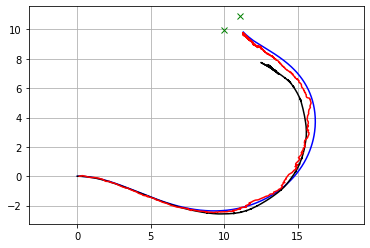

In [4]:
for i in range(ekfSlam.calc_n_LM(xEst)):
    plt.plot(xEst[ekfSlam.STATE_SIZE + i * 2],
            xEst[ekfSlam.STATE_SIZE + i * 2 + 1], "xg")

plt.plot(hxTrue[0, :],
        hxTrue[1, :], "-b")
plt.plot(hxDR[0, :],
        hxDR[1, :], "-k")
plt.plot(hxEst[0, :],
        hxEst[1, :], "-r")
plt.axis("equal")
plt.grid(True)
plt.pause(0.001)

In [5]:
np.pi/4

0.7853981633974483

In [6]:
xEst

array([[11.2827038 ],
       [ 9.69872877],
       [ 2.30350196],
       [10.00694642],
       [ 9.95689411],
       [11.07451202],
       [10.89842993]])